In [10]:
import requests, json
SERVER_URL = 'http://127.0.0.1:8000/'
proxies = {'http':''}

In [12]:

data={'points':'95,54,142,-33', 'time':140}
r = requests.get(SERVER_URL+'reconstruct/reconstruct_points/', params=data, verify=False, proxies=proxies)
#print json.dumps(json.loads(str(r.text)), sort_keys=True, indent=4)

r = requests.post(SERVER_URL+'reconstruct/reconstruct_points/',data=data,verify=False, proxies=proxies)
#print json.dumps(json.loads(str(r.text)), sort_keys=True, indent=4)

data={'points':'95,54,-117.26,32.7,142,-33', 'time':140, 'fc':''}
r = requests.post(SERVER_URL+'reconstruct/reconstruct_points/',data=data,verify=False, proxies=proxies)
#print json.dumps(json.loads(str(r.text)), sort_keys=True, indent=4)

r = requests.get(SERVER_URL+'reconstruct/reconstruct_points/', params=data, verify=False, proxies=proxies)
print(json.dumps(json.loads(str(r.text)), sort_keys=True, indent=4))
#print r.text


{
    "features": [
        {
            "geometry": {
                "coordinates": [
                    84.99, 
                    59.26
                ], 
                "type": "Point"
            }, 
            "properties": {
                "valid_time": [
                    600.0, 
                    "-inf"
                ]
            }, 
            "type": "Feature"
        }, 
        {
            "geometry": null, 
            "properties": {
                "valid_time": [
                    10.0, 
                    "-inf"
                ]
            }, 
            "type": "Feature"
        }, 
        {
            "geometry": {
                "coordinates": [
                    123.37, 
                    -65.76
                ], 
                "type": "Point"
            }, 
            "properties": {
                "valid_time": [
                    600.0, 
                    "-inf"
                ]
            }, 
            "type": "Feat

In [32]:
 
data= {
    'feature_collection' :
        '''{"type":"FeatureCollection",
            "features":[
                {"type":"Feature",
                "geometry":{
                    "type":"Polygon",
                    "coordinates":[[[128,-17],[133,-18],[138,-19],
                        [140,-23],[139,-27],[130,-27],[128,-24],
                        [127,-21],[127,-17],[128,-17]]]},
                    "properties":{
                        "id":123,
                        "waht":"345"
                    }},
                    
                    {"type":"Feature",
                    "geometry":
                    {
                        "type":"Point",
                        "coordinates":[51.0, 38.0]
                    },
                    "properties":{
                        "id":222
                    }
                    }
            
                    
                    ]}
        ''',
    'geologicage':'140',
    'model':'SETON2012',
    
}

print(data)

r = requests.get(SERVER_URL+'reconstruct/reconstruct_feature_collection/', params=data, verify=False, proxies=proxies)
#print json.dumps(json.loads(str(r.text)), sort_keys=True, indent=4)

data['keep_properties'] = ''
r = requests.get(SERVER_URL+'reconstruct/reconstruct_feature_collection/', params=data, verify=False, proxies=proxies)
#print json.dumps(json.loads(str(r.text)), sort_keys=True, indent=4)

r = requests.post(SERVER_URL+'reconstruct/reconstruct_feature_collection/', data=data, verify=False, proxies=proxies)
print(r.text)
#print json.dumps(json.loads(str(r.text)), sort_keys=True, indent=4)

{'geologicage': '140', 'model': 'SETON2012', 'feature_collection': '{"type":"FeatureCollection",\n           "features":[\n               {"type":"Feature",\n               "geometry":{\n                   "type":"Polygon",\n                   "coordinates":[[[128,-17],[133,-18],[138,-19],\n                       [140,-23],[139,-27],[130,-27],[128,-24],\n                       [127,-21],[127,-17],[128,-17]]]},\n                   "properties":{\n                       "id":123,\n                       "waht":"345"\n                   }},\n                   \n                   {"type":"Feature",\n                   "geometry":\n                   {\n                       "type":"Point",\n                       "coordinates":[51.0, 38.0]\n                   },\n                   "properties":{\n                       "id":222\n                   }\n                   }\n           \n                   \n                   ]}\n       '}
{"type": "FeatureCollection", "features": [{"geo

In [16]:
r = requests.get('http://paleobiodb.org/data1.1/occs/list.json?limit=all&interval_id=3001&show=coords,attr,loc,prot,time,strat,stratext,lith,lithext,geo,rem,ent,entname,crmod&showsource',
                 proxies=proxies)

print(r.status_code)
print(r.headers['content-type'])
print(r.encoding)

pbdb = json.loads(r.text)

lons = []
lats = []
for record in pbdb['records']:
    lons.append(record['lng'])
    lats.append(record['lat'])

print(pbdb)


200
application/json; charset=utf-8
utf-8
{u'elapsed_time': 0.226, u'data_url': u'http://paleobiodb.org/data1.1/occs/list.json?limit=all&interval_id=3001&show=coords,attr,loc,prot,time,strat,stratext,lith,lithext,geo,rem,ent,entname,crmod&showsource', u'data_source': u'The Paleobiology Database', u'parameters': {u'ident': u'latest', u'limit': u'all', u'interval_id': u'3001', u'show': u'coords,attr,loc,prot,time,strat,stratext,lith,lithext,geo,rem,ent,entname,crmod'}, u'title': u'PBDB Data Service', u'access_time': u'Fri 2017-09-22 02:37:53 GMT', u'data_license': u'Creative Commons CC-BY', u'documentation_url': u'http://paleobiodb.org/data1.1/occs/list_doc.html', u'license_url': u'http://creativecommons.org/licenses/by/4.0/', u'records': [{u'scm': u'"Silurian (Pridoli)"', u'mdi': 740, u'lm1': u'calcareous', u'mdf': u'Ju, J.', u'mna': u'Leperditia', u'cxi': 3001, u'lng': -78.839447, u'rid': [6990, 6990], u'lt1': u'not reported', u'eni': 66, u'lin': 59, u'gcm': u'"pelmicrite, stromatoliti

In [40]:
fc = {"type": "FeatureCollection"}
fc["features"] = []
for i,record in enumerate(pbdb['records']):
    feature = {"type": "Feature"}
    feature["geometry"] = {}
    feature["geometry"]["type"] = "Point"
    feature["geometry"]["coordinates"] = [record['lng'],record['lat']]
    feature["properties"] = {}
    feature["properties"]['Id'] = 'tmp'
    fc["features"].append(feature)


data= {'feature_collection' : json.dumps(fc)}

data['keep_properties'] = ''
data['time'] = 120.

#print data

r = requests.post(SERVER_URL+'reconstruct/reconstruct_feature_collection/', data=data, verify=False, proxies=proxies)
#print r.text

pts = json.loads(r.text)

#print pts

for feature in pts['features']:
    coords = feature['geometry']['coordinates']
    print(coords)

[-26.10331153226499, 30.256028477485994]
[-26.10331153226499, 30.256028477485994]
[-26.10331153226499, 30.256028477485994]
[-26.10331153226499, 30.256028477485994]
[-26.10331153226499, 30.256028477485994]
[-26.10331153226499, 30.256028477485994]
[-26.10331153226499, 30.256028477485994]
[-26.10331153226499, 30.256028477485994]
[-26.10331153226499, 30.256028477485994]
[-24.379202345689475, 29.868491597702366]
[-24.379202345689475, 29.868491597702366]
[-24.379202345689475, 29.868491597702366]
[-24.379202345689475, 29.868491597702366]
[-24.379202345689475, 29.868491597702366]
[-24.379202345689475, 29.868491597702366]
[-24.379202345689475, 29.868491597702366]
[-24.379202345689475, 29.868491597702366]
[-24.379202345689475, 29.868491597702366]
[-24.379202345689475, 29.868491597702366]
[-24.379202345689475, 29.868491597702366]
[-24.379202345689475, 29.868491597702366]
[-24.379202345689475, 29.868491597702366]
[-24.379202345689475, 29.868491597702366]
[-24.379202345689475, 29.868491597702366]
[

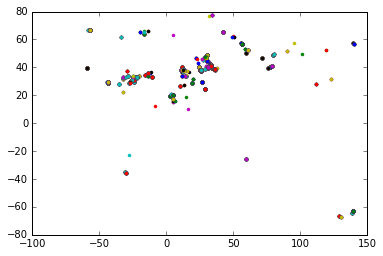

In [44]:
import matplotlib.pyplot as plt

%matplotlib inline

plat = []
plon = []
for feature in pts['features']:
    coords = feature['geometry']['coordinates']
    plt.plot(coords[0],coords[1],'.')
    plon.append(coords[0])
    plat.append(coords[1])
    

In [55]:
import cesiumpy

v = cesiumpy.Viewer(timeline=False,animation=False,imageryProvider=False,homeButton=False)
v.plot.scatter(plon, plat)


In [61]:
from io import StringIO

base_url = 'http://gws.gplates.org'
recon_time = 130
proxies = {'http':''}

r = requests.get('%s/reconstruct/coastlines/?time=%0.2f' % (base_url,recon_time),
                 proxies=proxies)
sp = json.loads(r.text)

res = cesiumpy.io.read_geojson(StringIO(sp))
#res = cesiumpy.io.read_geojson(fname)
viewer = cesiumpy.Viewer()
viewer.entities.add(res)
viewer


TypeError: initial_value must be unicode or None, not dict

In [64]:
import os
import tempfile
from contextlib import contextmanager

@contextmanager
def tempinput(data):
    temp = tempfile.NamedTemporaryFile(delete=False)
    temp.write(r.text)
    temp.close()
    try:
        yield temp.name
    finally:
        os.unlink(temp.name)

with tempinput('Some data.\nSome more data.') as tempfilename:
    res = cesiumpy.io.read_geojson(tempfilename)
    
viewer = cesiumpy.Viewer()
viewer.entities.add(res)
v.plot.scatter(plon, plat, color='red')
viewer
